## Twitter Big Data Analysis

### Checking Spark Session

In [47]:
sc

<SparkContext master=local[*] appName=PySparkShell>

### Loading in the Data

In [1]:
twitter = "/user1/twitter_training.csv"

twitter_df = spark.read.csv(twitter, header='true', inferSchema='true')
twitter_df.createOrReplaceTempView("twitter")

In [2]:
twitter_df.printSchema()

root
 |-- 2401: integer (nullable = true)
 |-- Borderlands: string (nullable = true)
 |-- Positive: string (nullable = true)
 |-- im getting on borderlands and i will murder you all ,: string (nullable = true)



In [3]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [4]:
newSchema = StructType([\
                       StructField("tweet_ID", IntegerType(), True),
                       StructField("entity", StringType(), True),
                       StructField("sentiment", StringType(), True),
                       StructField("tweet_content", StringType(), True)
                       ])

In [5]:
twitter_df = spark.read.format("csv")\
    .schema (newSchema)\
    .option("inferSchema", "True")\
    .option("path", twitter)\
    .load()

In [6]:
twitter_df.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



### EDA and Preprocessing

In [7]:
print('Count of rows: {0}'.format(twitter_df.count()))
print('Count of distinct rows: {0}'.format(twitter_df.distinct().count()))

Count of rows: 74682


Count of distinct rows: 71938


In [8]:
twitter_df_preprocessing = twitter_df.dropDuplicates()
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [9]:
print('Count of rows: {0}'.format(twitter_df_preprocessing.count()))
print('Count of distinct rows: {0}'.format(twitter_df_preprocessing.distinct().count()))

Count of rows: 71938


Count of distinct rows: 71938


In [10]:
from pyspark.sql.functions import col, sum as spark_sum

In [11]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|          326|
+--------+------+---------+-------------+



In [12]:
# Dropping rows with missing values
twitter_df_preprocessing = twitter_df_preprocessing.dropna()

In [13]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|            0|
+--------+------+---------+-------------+



In [14]:
# Viewing the schema of the new DataFrame
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



In [15]:
# Viewing first few rows of the filtered DataFrame
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [16]:
# Checking the new shape of the DataFrame
num_rows = twitter_df_preprocessing.count()
num_columns = len(twitter_df_preprocessing.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 71612
Number of Columns: 4


### EDA : Statistical Analsysis

In [17]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_df_preprocessing.describe().show()


Basic Statistics for Numerical Columns:


24/04/15 17:30:02 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+---------------+----------+--------------------+
|summary|          tweet_ID|         entity| sentiment|       tweet_content|
+-------+------------------+---------------+----------+--------------------+
|  count|             71612|          71612|     71612|               71612|
|   mean| 6436.986440819975|           null|      null|  3.2857142857142856|
| stddev|3741.9147567754244|           null|      null|   2.054210364052382|
|    min|                 1|         Amazon|Irrelevant|                    |
|    max|             13200|johnson&johnson|  Positive|🧻 at Home Depot ...|
+-------+------------------+---------------+----------+--------------------+



In [18]:
# Importing the necessary functions libraries
#import pyspark.sql.functions as func

In [19]:
# Calculating the distribution of the sentiment categories
sentiment_distribution = twitter_df_preprocessing.groupBy('sentiment').count()

# Viweing the distribution
sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|12528|
|  Positive|19702|
|   Neutral|17691|
|  Negative|21691|
+----------+-----+



According to the datafset documentation, 'Irrelevant' messages can be considered as neutral. ((www.kaggle.com, n.d.))

### EDA : Frequency Distribution of Sentiment

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Converting the Spark DataFrame to a Pandas DataFrame for visuals
sentiment_distribution_pd = sentiment_distribution.toPandas()

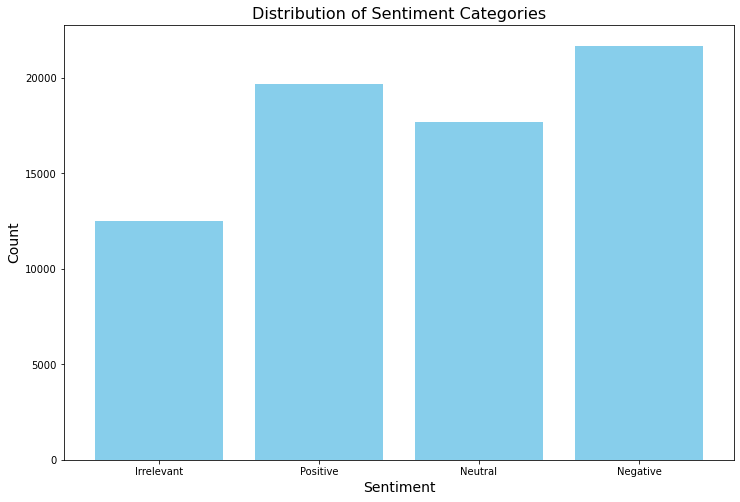

In [22]:
# Plotting a graph of distribution
plt.figure(figsize=(12, 8))
plt.bar(sentiment_distribution_pd['sentiment'], sentiment_distribution_pd['count'], color='skyblue')
plt.title('Distribution of Sentiment Categories', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [23]:
#pip install seaborn

In [24]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
# Selecting a specific entity to analyse
entity_of_interest = 'johnson&johnson'

In [39]:
# Filtering the DataFrame 
johnson_johnson_df = twitter_df_preprocessing.filter(twitter_df_preprocessing.entity == entity_of_interest)

johnson_johnson_df.show()

+--------+---------------+----------+--------------------+
|tweet_ID|         entity| sentiment|       tweet_content|
+--------+---------------+----------+--------------------+
|    6853|johnson&johnson|   Neutral|Adrian Thomas, vi...|
|    6866|johnson&johnson|Irrelevant| Vaccines Production|
|    6890|johnson&johnson|  Negative|They've had a leg...|
|    6909|johnson&johnson|   Neutral|Behind the $55 mi...|
|    6940|johnson&johnson|   Neutral|.  TYLENOL Cold H...|
|    6944|johnson&johnson|   Neutral|The Missouri Cour...|
|    6955|johnson&johnson|  Negative|Johnson & The Joh...|
|    6965|johnson&johnson|  Negative|              or wtf|
|    6971|johnson&johnson|  Positive|AstraZeneca and J...|
|    6973|johnson&johnson|  Positive|       Thank of God.|
|    6998|johnson&johnson|  Positive|cock & Johnson Re...|
|    7005|johnson&johnson|   Neutral|Johnson & Johnson...|
|    7040|johnson&johnson|   Neutral|Transvaginal mesh...|
|    7043|johnson&johnson|  Negative|Johnson & Johnson..

In [40]:
# Calculating the distribution of sentiment categories
johnson_johnson_sentiment_distribution = johnson_johnson_df.groupBy('sentiment').count()
johnson_johnson_sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|  192|
|   Neutral| 1001|
|  Positive|  252|
|  Negative|  809|
+----------+-----+



In [43]:
# Ordering the DataFrame in descending order
johnson_johnson_sentiment_distribution = johnson_johnson_sentiment_distribution.orderBy('count', ascending=False)

In [44]:
# Converting to Pandas DataFrame for visualization
johnson_johnson_sentiment_distribution_pd = johnson_johnson_sentiment_distribution.toPandas()

/tmp/ipykernel_427856/78352180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')


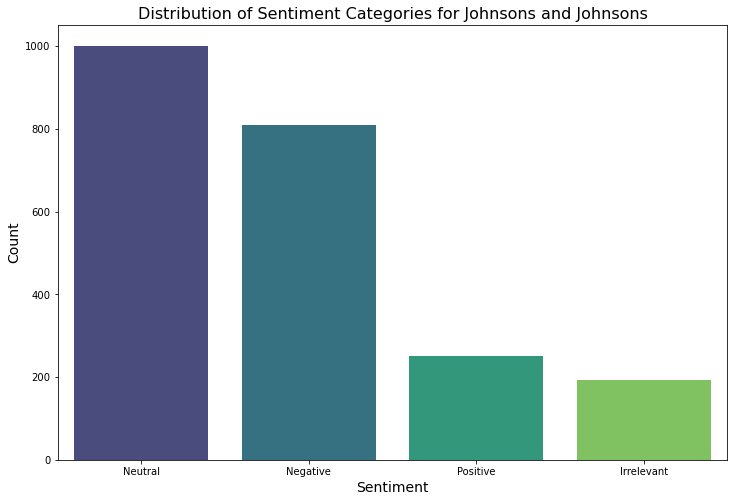

In [46]:
# Creating a Seaborn Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')
plt.title('Distribution of Sentiment Categories for Johnsons and Johnsons', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

One of the main applications and use cases of this asignment is sentiment analysis of big data, whether from a live stream or static source. In order to recreate this, we will remove the sentiment column provided with the dataset and conduct our own sentiment analysis of the data using spark.

In [49]:
# Dropping the 'sentiment' column
twitter_df_preprocessing = twitter_df_preprocessing.drop('sentiment')

In [50]:
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- tweet_content: string (nullable = true)



#### Saving to HDFS

In [51]:
path = "/user1/twitter2"

In [52]:
twitter_df_preprocessing.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()